In [1]:
import tensorflow as tf
from tensorflow import keras
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# Classification : Fashion MNIST

In [15]:
mnist = keras.datasets.fashion_mnist

In [16]:
(X_train_full , y_train_full) , (X_test , y_test )= mnist.load_data()

In [17]:
X_train_full.shape

(60000, 28, 28)

In [18]:
# Creating a validation set
# They are divided by 255.0 in order to scale the values b/w 0 and 1 and to also convert them to floats 

X_valid , X_train = X_train_full[:5000]/255.0 , X_train_full[5000:]/255.0
y_valid , y_train = y_train_full[:5000] , y_train_full[5000:]

In [19]:
class_names = ['T-shirt/top' , 'Trouser' , 'Pullover' , 'Dress' , 'Coat' , 'Sandal' , 'Shirt' ,'Sneaker', 'Bag' , 'Ankle Boot']
len(class_names)

10

In [20]:
class_names[y_train[0]]

'Coat'

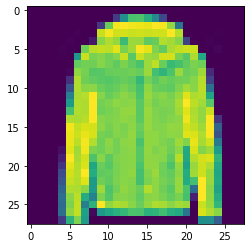

In [21]:
plt.imshow(X_train[0])

In [22]:
# Initaializing the neural network

model = keras.models.Sequential([keras.layers.Flatten(input_shape = [28,28] ) , 
                                 keras.layers.Dense(300 , activation = tf.nn.relu) , 
                                 keras.layers.Dense(100 , activation = tf.nn.relu) , 
                                 keras.layers.Dense(10 , activation = 'softmax')])

In [23]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_1 (Flatten)          (None, 784)               0         
_________________________________________________________________
dense_3 (Dense)              (None, 300)               235500    
_________________________________________________________________
dense_4 (Dense)              (None, 100)               30100     
_________________________________________________________________
dense_5 (Dense)              (None, 10)                1010      
Total params: 266,610
Trainable params: 266,610
Non-trainable params: 0
_________________________________________________________________


In [24]:
model.layers

In [25]:
model.compile(optimizer = tf.optimizers.Adam() , loss = 'sparse_categorical_crossentropy' , metrics = ['accuracy'])

In [34]:
history= model.fit(X_train , y_train , epochs = 50  , validation_data = (X_test , y_test))

Epoch 1/50
1719/1719 [==============================] - 13s 7ms/step - loss: 0.0829 - accuracy: 0.9696 - val_loss: 144.4993 - val_accuracy: 0.8661
Epoch 2/50
1719/1719 [==============================] - 11s 6ms/step - loss: 0.0776 - accuracy: 0.9712 - val_loss: 140.4062 - val_accuracy: 0.8639
Epoch 3/50
1719/1719 [==============================] - 9s 6ms/step - loss: 0.0773 - accuracy: 0.9702 - val_loss: 160.2045 - val_accuracy: 0.8641
Epoch 4/50
1719/1719 [==============================] - 8s 5ms/step - loss: 0.0758 - accuracy: 0.9708 - val_loss: 140.6250 - val_accuracy: 0.8756
Epoch 5/50
1719/1719 [==============================] - 7s 4ms/step - loss: 0.0768 - accuracy: 0.9707 - val_loss: 155.3251 - val_accuracy: 0.8631
Epoch 6/50
1719/1719 [==============================] - 7s 4ms/step - loss: 0.0744 - accuracy: 0.9718 - val_loss: 163.7445 - val_accuracy: 0.8643
Epoch 7/50
1719/1719 [==============================] - 7s 4ms/step - loss: 0.0725 - accuracy: 0.9724 - val_loss: 170.7874

In [23]:
y_valid.shape

(5000,)

In [35]:
history.history

{'loss': [0.08285124599933624,
  0.07757215946912766,
  0.07725460082292557,
  0.07579086720943451,
  0.07683904469013214,
  0.07443268597126007,
  0.07249683141708374,
  0.07532493770122528,
  0.07263819873332977,
  0.06864956766366959,
  0.07052664458751678,
  0.0680767297744751,
  0.06496132165193558,
  0.06607595086097717,
  0.0660155788064003,
  0.06831945478916168,
  0.0644572451710701,
  0.06062519550323486,
  0.060595445334911346,
  0.06303846091032028,
  0.060280974954366684,
  0.05882948637008667,
  0.05541285127401352,
  0.05954530090093613,
  0.05462848022580147,
  0.05963793024420738,
  0.052598822861909866,
  0.05751928314566612,
  0.05799093097448349,
  0.04831036552786827,
  0.057707346975803375,
  0.052098676562309265,
  0.050453636795282364,
  0.05354975908994675,
  0.050210803747177124,
  0.05178717523813248,
  0.04811292514204979,
  0.04893844947218895,
  0.050288088619709015,
  0.04833532124757767,
  0.05132614076137543,
  0.044532496482133865,
  0.0482664033770561

In [44]:
model.evaluate(X_test, y_test)

313/313 [==============================] - 1s 2ms/step - loss: 242.1996 - accuracy: 0.8658


[242.19956970214844, 0.8658000230789185]

(0.0, 1.0)

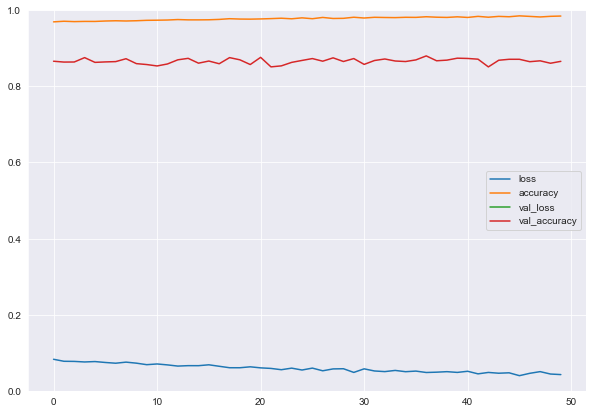

In [41]:
import seaborn as sns
sns.set_style(style = 'darkgrid')
pd.DataFrame(history.history).plot(figsize = (10 , 7))
plt.gca().set_ylim(0,1)

In [50]:
X_new = X_test[:10]
y_pred = model.predict_classes(X_new)
y_pred

C:\Users\RUSSEL\ANACONDA3\lib\site-packages\tensorflow\python\keras\engine\sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


array([9, 2, 1, 1, 6, 1, 4, 4, 5, 7], dtype=int64)

In [51]:
y_test[:10]

array([9, 2, 1, 1, 6, 1, 4, 6, 5, 7], dtype=uint8)